#**About the My Dataset :**

This dataset contains 50 features. Each instance holds the information of an IP flow generated by a network device i.e., source and destination IP addresses, ports, flow durations, interarrival times, packet sizes and layer 7 protocol (application) used on that flow as the class. Most of the attributes are numeric type but there are also nominal types.

The dataset presented here was obtained by processing the different PCAP files with Flow Labeler, an application developed to perform the aggregation of packets into flows, the calculation of flow statistics and the labeling of the flows with their respective application through the nDPI library


# **Initiate and Configure Spark**

In [ ]:
# every package has to install each time googlecolab runs jyputernoot book.
!pip install pyspark

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("network traffic") \
                            .master("local[*]")\
                            .config("spark.some.config.option", "some-value") \
                            .getOrCreate()

---
# **Task 1 - Data Loading and Preprocessing**
---

In [ ]:
#Identify the student who made a contribution and mention their name in the appropriate section of the code.

## The students' names who made contributions

#Data Loading from the drive
dataset = spark.read.csv('/content/Unicauca-dataset-April-June-2019-Network-flows.csv',inferSchema=True, header =True)

dataset.show()
dataset.count()

+--------------------+--------------+-------------+--------+--------------+--------+-----+-------------+---------------+------+------+----------------+----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+---------------+-----------------+--------+--------+----------------+----------------+------------------+------------------+------------------+-------------------+------------------+-------------------+-------------------+---------------+-----------------+--------+--------+----------------+----------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------+--------+--------------------+-----------+
|            flow_key|src_ip_numeric|       src_ip|src_port|        dst_ip|dst_port|proto|pktTotalCount|octetTotalCount|min_ps|max_ps|          avg_ps|      std_dev_ps|         flowStart|      

9947

In [ ]:
dataset.printSchema()

root
 |-- flow_key: string (nullable = true)
 |-- src_ip_numeric: long (nullable = true)
 |-- src_ip: string (nullable = true)
 |-- src_port: integer (nullable = true)
 |-- dst_ip: string (nullable = true)
 |-- dst_port: integer (nullable = true)
 |-- proto: integer (nullable = true)
 |-- pktTotalCount: integer (nullable = true)
 |-- octetTotalCount: integer (nullable = true)
 |-- min_ps: integer (nullable = true)
 |-- max_ps: integer (nullable = true)
 |-- avg_ps: double (nullable = true)
 |-- std_dev_ps: double (nullable = true)
 |-- flowStart: double (nullable = true)
 |-- flowEnd: double (nullable = true)
 |-- flowDuration: double (nullable = true)
 |-- min_piat: double (nullable = true)
 |-- max_piat: double (nullable = true)
 |-- avg_piat: double (nullable = true)
 |-- std_dev_piat: double (nullable = true)
 |-- f_pktTotalCount: integer (nullable = true)
 |-- f_octetTotalCount: integer (nullable = true)
 |-- f_min_ps: integer (nullable = true)
 |-- f_max_ps: integer (nullable = t

In [ ]:
#find out is there any null value in any column
print("total records:",dataset.count())
[print(col,"Total null values",dataset.where(dataset[col].isNull()).count()) for col in dataset.columns]

total records: 9947
flow_key Total null values 0
src_ip_numeric Total null values 0
src_ip Total null values 0
src_port Total null values 0
dst_ip Total null values 0
dst_port Total null values 0
proto Total null values 0
pktTotalCount Total null values 0
octetTotalCount Total null values 0
min_ps Total null values 0
max_ps Total null values 0
avg_ps Total null values 0
std_dev_ps Total null values 0
flowStart Total null values 0
flowEnd Total null values 0
flowDuration Total null values 0
min_piat Total null values 0
max_piat Total null values 0
avg_piat Total null values 0
std_dev_piat Total null values 0
f_pktTotalCount Total null values 0
f_octetTotalCount Total null values 0
f_min_ps Total null values 0
f_max_ps Total null values 0
f_avg_ps Total null values 0
f_std_dev_ps Total null values 0
f_flowStart Total null values 0
f_flowEnd Total null values 0
f_flowDuration Total null values 0
f_min_piat Total null values 0
f_max_piat Total null values 0
f_avg_piat Total null values 0
f

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# taking only integer features
# whether the column with integer datatype have 0 values
numeric_features = [t[0] for t in dataset.dtypes if t[1] == 'int']
dataset.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
src_port,9947,51638.18920277471,13121.926586995749,0,65530
dst_port,9947,2483.0315673067257,3711.706412158035,0,8888
proto,9947,13.325223685533327,5.197089834568202,1,17
pktTotalCount,9947,24.248014476726652,253.70633218542216,1,14090
octetTotalCount,9947,18766.689755705236,345848.4331053983,29,22740352
min_ps,9947,53.36604001206394,45.67928247914788,29,1378
max_ps,9947,892.5986729667236,2321.719959354795,29,26320
f_pktTotalCount,9947,9.7756107369056,82.56182272091553,1,4272
f_octetTotalCount,9947,1703.374685834925,11588.110656167586,29,640311


In [ ]:
#convert the o values in the integer datatype column to nan values
import numpy as np
from pyspark.sql.functions import when
dataset=dataset.withColumn("src_port",when(dataset.src_port==0,np.nan).otherwise (dataset.src_port))
dataset=dataset.withColumn("dst_port",when(dataset.dst_port==0,np.nan).otherwise(dataset.dst_port))
dataset=dataset.withColumn("b_pktTotalCount",when(dataset.b_pktTotalCount==0,np.nan).otherwise(dataset.b_pktTotalCount))
dataset=dataset.withColumn("b_octetTotalCount",when(dataset.b_octetTotalCount==0,np.nan).otherwise(dataset.b_octetTotalCount))
dataset=dataset.withColumn("b_min_ps",when(dataset.b_min_ps==0,np.nan).otherwise(dataset.b_min_ps))
dataset=dataset.withColumn("b_max_ps",when(dataset.b_max_ps==0,np.nan).otherwise(dataset.b_max_ps))
dataset.select("src_port","dst_port","b_pktTotalCount","b_octetTotalCount","b_min_ps","b_max_ps").show(5)

+--------+--------+---------------+-----------------+--------+--------+
|src_port|dst_port|b_pktTotalCount|b_octetTotalCount|b_min_ps|b_max_ps|
+--------+--------+---------------+-----------------+--------+--------+
|    67.0|    67.0|            5.0|           1950.0|   389.0|   394.0|
|    67.0|    67.0|            NaN|              NaN|     NaN|     NaN|
|    67.0|    67.0|           13.0|           5062.0|   389.0|   394.0|
|    67.0|    67.0|            NaN|              NaN|     NaN|     NaN|
|     NaN|     NaN|            NaN|              NaN|     NaN|     NaN|
+--------+--------+---------------+-----------------+--------+--------+
only showing top 5 rows



In [ ]:
#impute
#replace the nan values with mean value using the imputer function in the integer datatype column

from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["src_port","dst_port","b_pktTotalCount","b_octetTotalCount","b_min_ps","b_max_ps"],outputCols=["src_port","dst_port","b_pktTotalCount","b_octetTotalCount","b_min_ps","b_max_ps"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+--------------------+--------------+-------------+------------------+--------------+------------------+-----+-------------+---------------+------+------+----------------+----------------+------------------+------------------+----------------+-------------------+----------------+----------------+----------------+---------------+-----------------+--------+--------+----------------+----------------+------------------+------------------+----------------+------------------+----------------+----------------+----------------+------------------+------------------+-----------------+-----------------+----------------+----------------+------------------+------------------+-------------------+------------------+----------------+----------------+----------------+-------------+--------+--------------------+-----------+
|            flow_key|src_ip_numeric|       src_ip|          src_port|        dst_ip|          dst_port|proto|pktTotalCount|octetTotalCount|min_ps|max_ps|          avg_ps|      std_d

In [ ]:
# taking only double features
#check whether the double datatype columns in the dataset have zero values
numeric_features = [t[0] for t in dataset.dtypes if t[1] == 'double']
dataset.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
src_port,9947,51695.357085346215,13008.9436393046,67.0,65530.0
dst_port,9947,2485.7804951690828,3710.786726439991,53.0,8888.0
avg_ps,9947,173.40618086985936,318.2090729342742,29.0,5298.5
std_dev_ps,9947,211.27393856427057,557.0238468093889,0.0,7732.93106622579
flowStart,9947,1.555965764138953E9,6220.538304188799,1.55595351874987E9,1.55597624568652E9
flowEnd,9947,1.555965799260264E9,6225.269927043462,1.5559535187503E9,1.55597641942224E9
flowDuration,9947,35.12131236430519,145.60153363392078,0.0,1786.02249717712
min_piat,9947,1.043988008480929,22.21729564350694,0.0,719.482880830765
max_piat,9947,14.6910229496732,63.95353123853814,0.0,1676.9918961525


In [ ]:
#convert the o values in the double datatype column to nan  values
#here we are using the column only we are using for the featured columns (ie) input columns
import numpy as np
from pyspark.sql.functions import when
dataset=dataset.withColumn("std_dev_ps",when(dataset.src_port==0,np.nan).otherwise (dataset.src_port))
dataset=dataset.withColumn("flowDuration",when(dataset.dst_port==0,np.nan).otherwise(dataset.dst_port))
dataset=dataset.withColumn("min_piat",when(dataset.b_pktTotalCount==0,np.nan).otherwise(dataset.b_pktTotalCount))
dataset=dataset.withColumn("max_piat",when(dataset.b_octetTotalCount==0,np.nan).otherwise(dataset.b_octetTotalCount))
dataset=dataset.withColumn("std_dev_piat",when(dataset.b_min_ps==0,np.nan).otherwise(dataset.b_min_ps))
dataset=dataset.withColumn("avg_piat",when(dataset.b_max_ps==0,np.nan).otherwise(dataset.b_max_ps))
dataset.select("std_dev_ps","flowDuration","min_piat","max_piat","std_dev_piat","avg_piat").show(5)

+------------------+------------------+------------------+------------------+-----------------+-----------------+
|        std_dev_ps|      flowDuration|          min_piat|          max_piat|     std_dev_piat|         avg_piat|
+------------------+------------------+------------------+------------------+-----------------+-----------------+
|              67.0|              67.0|               5.0|            1950.0|            389.0|            394.0|
|              67.0|              67.0|15.639000543183053|18438.760999456816|72.51580662683324|806.2223791417708|
|              67.0|              67.0|              13.0|            5062.0|            389.0|            394.0|
|              67.0|              67.0|15.639000543183053|18438.760999456816|72.51580662683324|806.2223791417708|
|51695.357085346215|2485.7804951690823|15.639000543183053|18438.760999456816|72.51580662683324|806.2223791417708|
+------------------+------------------+------------------+------------------+-----------

In [ ]:
#impute
#using imputer functin convert the nan value into mean of double datatype column
from pyspark.ml.feature import Imputer
imputer=Imputer(inputCols=["std_dev_ps","flowDuration","min_piat","max_piat","std_dev_piat","avg_piat"],outputCols=["std_dev_ps","flowDuration","min_piat","max_piat","std_dev_piat","avg_piat"])
model=imputer.fit(dataset)
dataset=model.transform(dataset)
dataset.show(5)

+--------------------+--------------+-------------+------------------+--------------+------------------+-----+-------------+---------------+------+------+----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+---------------+-----------------+--------+--------+----------------+----------------+------------------+------------------+----------------+------------------+----------------+----------------+----------------+------------------+------------------+-----------------+-----------------+----------------+----------------+------------------+------------------+-------------------+------------------+----------------+----------------+----------------+-------------+--------+--------------------+-----------+
|            flow_key|src_ip_numeric|       src_ip|          src_port|        dst_ip|          dst_port|proto|pktTotalCount|octetTotalCount|min_ps|max_ps|          avg_ps|    

In [ ]:
# taking only string features
string_features = [t[0] for t in dataset.dtypes if t[1] == 'string']
dataset.select(string_features)

DataFrame[flow_key: string, src_ip: string, dst_ip: string, category: string, application_protocol: string, web_service: string]

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
import ipaddress

# Define a UDF to convert IP addresses to integers
ip_to_int = udf(lambda ip: int(ipaddress.IPv4Address(ip)), IntegerType())

# Convert the IP addresses in the "ip_address" column to integers
dataset = dataset.withColumn("s_ip_numeric", ip_to_int(dataset["src_ip"]))
dataset = dataset.withColumn("d_ip_numeric", ip_to_int(dataset["dst_ip"]))

dataset.select("s_ip_numeric","src_ip").show()
dataset.show()

+------------+-------------+
|s_ip_numeric|       src_ip|
+------------+-------------+
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700799|192.168.121.1|
| -1062700798|192.168.121.2|
| -1062700798|192.168.121.2|
| -1062700798|192.168.121.2|
| -1062700798|192.168.121.2|
| -1062700798|192.168.121.2|
+------------+-------------+
only showing top 20 rows

+--------------------+--------------+-------------+------------------+--------------+------------------+-----+-------------+---------------+------+------+----------------+------------------+------------------+------------------+------------------+------------------+------------

In [ ]:
# Now we will apply string indexing to categorial variables using pipe line
#converting the string datatypes to numerical data
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler

categoricalColumns = ['flow_key','category', 'application_protocol']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])

    print(stringIndexer.getOutputCol())
    stages += [stringIndexer, encoder]

#Converting the label column datatype to numerical column with the name label
label_stringIdx = StringIndexer(inputCol = 'web_service', outputCol = 'label')
print(label_stringIdx)
stages += [label_stringIdx]

flow_keyIndex
categoryIndex
application_protocolIndex
StringIndexer_c95bc6cf04e8


In [ ]:
#using vector assembler combine the columns into single column in the name features
numericCols = ['s_ip_numeric','d_ip_numeric', 'src_port', 'dst_port', 'proto', 'pktTotalCount','octetTotalCount','min_ps',
 'max_ps',
 'avg_ps',
 'std_dev_ps',
 'flowStart',
 'flowEnd',
 'flowDuration',
 'min_piat',
 'max_piat',
 'avg_piat',
 'std_dev_piat']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
print(assemblerInputs)
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

['flow_keyclassVec', 'categoryclassVec', 'application_protocolclassVec', 's_ip_numeric', 'd_ip_numeric', 'src_port', 'dst_port', 'proto', 'pktTotalCount', 'octetTotalCount', 'min_ps', 'max_ps', 'avg_ps', 'std_dev_ps', 'flowStart', 'flowEnd', 'flowDuration', 'min_piat', 'max_piat', 'avg_piat', 'std_dev_piat']


In [ ]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(dataset)
dataset = pipelineModel.transform(dataset)
dataset.show(12,True)

+--------------------+--------------+-------------+------------------+--------------+------------------+-----+-------------+---------------+------+------+----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+---------------+-----------------+--------+--------+----------------+----------------+------------------+------------------+----------------+-------------------+----------------+----------------+----------------+------------------+------------------+-----------------+-----------------+----------------+----------------+------------------+------------------+-------------------+-------------------+----------------+----------------+----------------+-------------+--------+--------------------+-----------+------------+------------+-------------+-------------------+-------------+----------------+-------------------------+----------------------------+-----+--------------------+


In [ ]:
datasetselected=dataset.select("label","features")
datasetselected.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
| 28.0|(9328,[7623,9293,...|
| 25.0|(9328,[2,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
| 25.0|(9328,[0,9293,930...|
| 25.0|(9328,[2,9293,930...|
|  5.0|(9328,[5928,9291,...|
|  5.0|(9328,[7160,9291,...|
|  5.0|(9328,[6442,9291,...|
|  5.0|(9328,[595,9291,9...|
|  5.0|(9328,[7982,9291,...|
+-----+--------------------+
only showing top 20 rows



---
# **Task 2 - Model Selection and Implementation**
---


In [ ]:
# Splitting the data into training and testing set
(trainingData, testData) = datasetselected.randomSplit([0.8, 0.2])

In [ ]:

#using Decision Tree machine learning model to train the dataset
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features",impurity='entropy', maxDepth=4, seed=1234)
model = dt.fit(trainingData)
predictions_dt = model.transform(testData)


In [ ]:
#using multiclassification evaluator to evaluate the overall accuracy
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_dt)
print("Test accuracy =  " , accuracy)
predictions_dt.select("label","prediction").show(10)
print(model.toDebugString)

Test accuracy =   0.8573588709677419
+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_c8d1f2139564, depth=4, numNodes=25, numClasses=44, numFeatures=9328
  If (feature 9291 in {0.0})
   If (feature 9292 in {0.0})
    If (feature 9293 in {0.0})
     If (feature 9294 in {0.0})
      Predict: 6.0
     Else (feature 9294 not in {0.0})
      Predict: 4.0
    Else (feature 9293 not in {0.0})
     If (feature 9313 <= 60.0)
      Predict: 3.0
     Else (feature 9313 > 60.0)
      Predict: 25.0
   Else (feature 9292 not in {0.0})
    If (feature 9305 in {0.0})
     Predict: 22.0
    Else (feature 9305 not in {0.0})
     Predict: 0.0
  Else (feature 9291 not in {0.0})
   If (feature 9305 in {0.0})


In [ ]:


# this is code for multiple classification using logistic Regression
from pyspark.ml.classification import OneVsRest
from pyspark.ml.classification import LogisticRegression
#train, test = datasetselected.randomSplit([0.7, 0.3], seed = 2018)

lr = LogisticRegression(maxIter=100, featuresCol="features",labelCol='label')
ovr = OneVsRest(classifier=lr, labelCol='label', featuresCol='features')
#from pyspark.ml import Pipeline
#pipeline_ovr = Pipeline(stages=[vecAssembler, stdScaler, ovr])
#pipelineModel_ovr = pipeline_ovr.fit(trainDF)

Model = ovr.fit(trainingData)
predictions_ovr = Model.transform(testData)

evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_ovr)
print("Test accuracy =  " , accuracy)
predictions_ovr.select("label","prediction").show(10)

Test accuracy =   0.6537298387096774
+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows



---
# **Task 3 - Model Parameter Tuning**
---


In [ ]:


from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

dt = DecisionTreeClassifier(labelCol="label", featuresCol="features",impurity='entropy', maxDepth=4, seed=1234)

# Define the parameter grid for cross-validation
paramGrid = ParamGridBuilder() \
    .addGrid(dt.maxDepth, [4, 6, 8]) \
    .addGrid(dt.impurity, ['entropy', 'gini']) \
    .build()

# Define the cross-validation procedure
cv_dt = CrossValidator(estimator=dt,
                    estimatorParamMaps=paramGrid,
                    evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                    numFolds=3)
#(trainingData, testData) = datasetselected.randomSplit([0.7, 0.3])
# Train the model using cross-validation
cvModel = cv_dt.fit(trainingData)

# Evaluate the model on the test data
predictions_cvdt = cvModel.transform(testData)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_cvdt)
print("Test accuracy =  ", accuracy)

Test accuracy =   0.9410282258064516


In [ ]:

from pyspark.ml.classification import OneVsRest
from pyspark.ml.classification import LogisticRegression

from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(maxIter=100, featuresCol="features",labelCol='label',regParam=0.0, elasticNetParam=0.0)
ovr = OneVsRest(classifier=lr, labelCol='label', featuresCol='features')

# Define the parameter grid for cross-validation
paramGrid = ParamGridBuilder() \
    .addGrid(lr.regParam, [0.1, 0.3]) \
    .addGrid(lr.elasticNetParam, [0.0, 0.1]) \
    .addGrid(lr.maxIter, [50, 100]) \
    .build()

# Define the cross-validation procedure
cv_lr = CrossValidator(estimator=ovr,
                    estimatorParamMaps=paramGrid,
                    evaluator=MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy"),
                    numFolds=3)
#avoid recomputing of same data multiple times
trainingData = trainingData.cache()
testData = testData.cache()

# Train the model using cross-validation
Model = cv_lr.fit(trainingData)

# Evaluate the model on the test data
predictions_cvlr = Model.transform(testData)
evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions_cvlr)
print("Test accuracy =  ", accuracy)


Test accuracy =   0.8019153225806451


---
# **Task 4 - Model Evaluation and Accuracy Calculation**
---

In [ ]:

#Evaluating the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Define a function to compute classification report
def compute_classification_report(predictions):
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol='prediction')

    accuracy = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    precision = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    recall = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    f1 = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})

    report = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1
    }

    return report
report_dt = compute_classification_report(predictions_dt)
report_cvdt = compute_classification_report(predictions_cvdt)

print("Evaluation metrics of Decision Tree:")
for metric, value in report_dt.items():
    print(f"{metric}: {value:.4f}")

print(" Evaluation metrics of Decision Tree after tuning the parameter")
for metric, value in report_cvdt.items():
    print(f"{metric}: {value:.4f}")

Evaluation metrics of Decision Tree:
Accuracy: 0.8574
Precision: 0.7992
Recall: 0.8574
F1-score: 0.8206
 Evaluation metrics of Decision Tree after tuning the parameter
Accuracy: 0.9410
Precision: 0.9311
Recall: 0.9410
F1-score: 0.9321


In [ ]:

#Evaluating the model
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Define a function to compute classification report
def compute_classification_report(predictions, evaluator_name):
    evaluator = MulticlassClassificationEvaluator(labelCol="label", predictionCol='prediction')

    if evaluator_name == "accuracy":
        metric_value = evaluator.evaluate(predictions, {evaluator.metricName: "accuracy"})
    elif evaluator_name == "weightedPrecision":
        metric_value = evaluator.evaluate(predictions, {evaluator.metricName: "weightedPrecision"})
    elif evaluator_name == "weightedRecall":
        metric_value = evaluator.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
    elif evaluator_name == "f1":
        metric_value = evaluator.evaluate(predictions, {evaluator.metricName: "f1"})
    else:
        raise ValueError("Invalid evaluator name")

    report = {
        evaluator_name: metric_value
    }

    return report

report_ovr = {}
report_cvlr = {}

for evaluator_name in ["accuracy", "weightedPrecision", "weightedRecall", "f1"]:
    if evaluator_name == "accuracy":
        predictions = predictions_ovr
    else:
        predictions = predictions_cvlr

    report = compute_classification_report(predictions, evaluator_name)
    report_ovr.update(report) if evaluator_name == "accuracy" else report_cvlr.update(report)

print("Evaluation metrics of Logistic Regression:")
for metric, value in report_ovr.items():
    print(f"{metric}: {value:.4f}")

print("Evaluation metrics of Logistic Regression after tuning the parameter:")
for metric, value in report_cvlr.items():
    print(f"{metric}: {value:.4f}")

Evaluation metrics of Logistic Regression:
accuracy: 0.6537
Evaluation metrics of Logistic Regression after tuning the parameter:
weightedPrecision: 0.7485
weightedRecall: 0.8019
f1: 0.7523


---
# **Task 5 - Results Visualization or Printing**
---

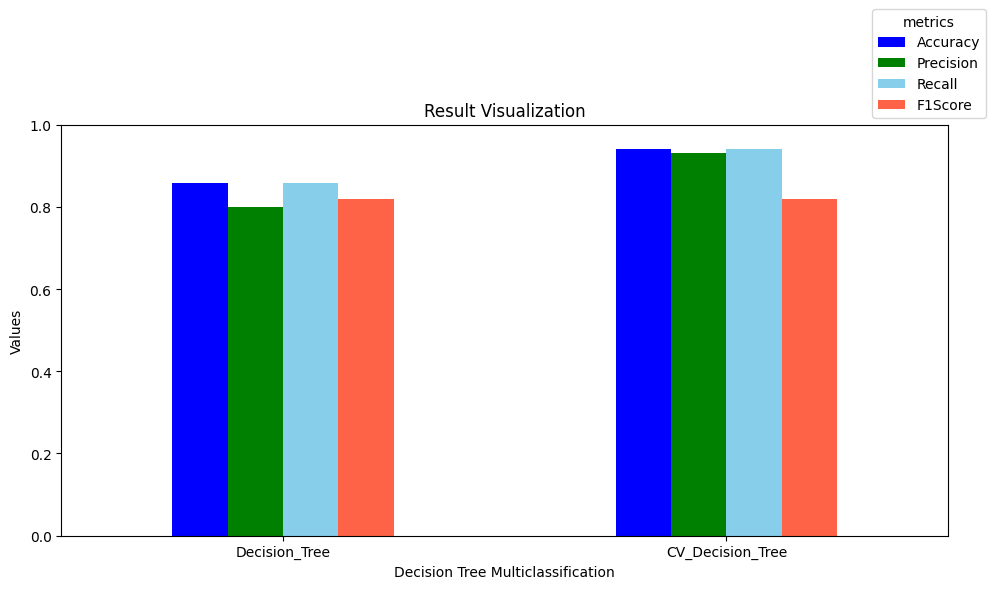

In [ ]:

#import libraries to plot the chart
import matplotlib.pyplot as plt
import pandas as pd

# Define evaluation metrics
model = ['Decision_Tree', 'CV_Decision_Tree']

# List of evaluating metrics
a1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "accuracy"})
a2= evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "accuracy"})
accuracy=[a1,a2]
p1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedPrecision"})
p2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "weightedPrecision"})
precision=[p1,p2]
r1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedRecall"})
r2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "weightedRecall"})
recall=[r1,r2]
f1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "f1"})
f2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "f1"})
f1score=[f1,f2]

# Create a DataFrame
dataset_df = pd.DataFrame({'Model': model,
                           'Accuracy': accuracy,
                           'Precision': precision,
                           'Recall': recall,
                           'F1Score':f1})

# Set the index to 'Metrics'
dataset_df.set_index('Model', inplace=True)

# Plot the evaluation metrics
graph = dataset_df.plot(kind='bar', figsize=(10, 6), rot=0, color=['blue','green','skyblue','tomato'])
plt.title('Result Visualization')
plt.ylabel('Values')
plt.xlabel('Decision Tree Multiclassification')
plt.ylim(0, 1)
plt.legend(title='metrics', bbox_to_anchor=(1.05, 1), loc='lower right')
plt.tight_layout()
plt.show()


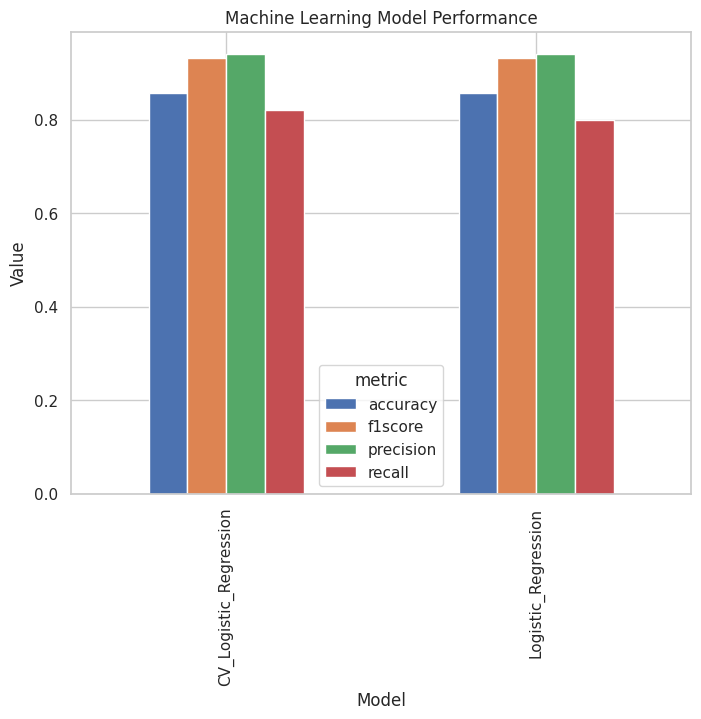

In [ ]:
import pandas as pd

metrics = ['Logistic_Regression', 'CV_Logistic_Regression']

# List of evaluating metrics
a1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "accuracy"})
a2= evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "accuracy"})
accuracy=[a1,a2]
p1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedPrecision"})
p2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "weightedPrecision"})
precision=[p1,p2]
r1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "weightedRecall"})
r2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "weightedRecall"})
recall=[r1,r2]
f1 = evaluator.evaluate(predictions_dt, {evaluator.metricName: "f1"})
f2 = evaluator.evaluate(predictions_cvdt, {evaluator.metricName: "f1"})
f1score=[f1,f2]

data = {
    'model': ['Logistic_Regression'] * 4 + ['CV_Logistic_Regression'] * 4,
    'metric': ['accuracy', 'precision', 'recall', 'f1score'] * 2,
    'value': accuracy + precision + recall + f1score
}

models_df = pd.DataFrame(data)
grouped_df = models_df.groupby(['model', 'metric']).mean().reset_index()
pivot_df = grouped_df.pivot(index='model', columns='metric', values='value')

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))

pivot_df.plot(kind='bar', ax=ax)
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.set_title('Machine Learning Model Performance')

plt.show()